In [1]:
## Import common pakages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable as stb
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv(r'Clean_SBA_Loan.csv')
df.head()

,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,UrbanRural,RevLineCr,LowDoc,DisbursementGross,MIS_Status,GrAppv,SBA_Appv,sector,isFranchise,sameState,Portion
0,1997,84,4,2,0,0,0,N,Y,60000.0,P I F,60000.0,48000.0,Retail_trade,No Franchise,0,0.80
1,1997,60,2,2,0,0,0,N,Y,40000.0,P I F,40000.0,32000.0,Accommodation_food_serv,No Franchise,1,0.80
2,1997,180,7,1,0,0,0,N,N,287000.0,P I F,287000.0,215250.0,Health_care_social_ass,No Franchise,1,0.75
3,1997,120,19,1,0,0,0,N,N,517000.0,P I F,517000.0,387750.0,Manufacturing,No Franchise,0,0.75
4,1997,84,1,2,0,0,0,N,Y,45000.0,P I F,45000.0,36000.0,Other_no_pub,No Franchise,0,0.80


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459506 entries, 0 to 459505
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ApprovalFY         459506 non-null  int64  
 1   Term               459506 non-null  int64  
 2   NoEmp              459506 non-null  int64  
 3   NewExist           459506 non-null  int64  
 4   CreateJob          459506 non-null  int64  
 5   RetainedJob        459506 non-null  int64  
 6   UrbanRural         459506 non-null  int64  
 7   RevLineCr          459506 non-null  object 
 8   LowDoc             459506 non-null  object 
 9   DisbursementGross  459506 non-null  float64
 10  MIS_Status         459506 non-null  object 
 11  GrAppv             459506 non-null  float64
 12  SBA_Appv           459506 non-null  float64
 13  sector             459506 non-null  object 
 14  isFranchise        459506 non-null  object 
 15  sameState          459506 non-null  int64  
 16  Po

In [4]:
## Checking for missing value
df.isnull().sum()

ApprovalFY           0
Term                 0
NoEmp                0
NewExist             0
CreateJob            0
RetainedJob          0
UrbanRural           0
RevLineCr            0
LowDoc               0
DisbursementGross    0
MIS_Status           0
GrAppv               0
SBA_Appv             0
sector               0
isFranchise          0
sameState            0
Portion              0
dtype: int64

In [5]:
df.describe(include='O').T

,count,unique,top,freq
RevLineCr,459506,2,N,265983
LowDoc,459506,2,N,434364
MIS_Status,459506,2,P I F,360960
sector,459506,20,Retail_trade,81344
isFranchise,459506,2,No Franchise,445170


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApprovalFY,459506.0,2003.016381,5.667214,1984.00,2000.0,2005.0,2007.00,2014.0
Term,459506.0,93.719986,68.305137,0.00,59.0,84.0,90.00,527.0
NoEmp,459506.0,9.893912,56.664519,0.00,2.0,4.0,9.00,9999.0
NewExist,459506.0,1.264884,0.441272,1.00,1.0,1.0,2.00,2.0
CreateJob,459506.0,1.905098,16.910585,0.00,0.0,0.0,1.00,5621.0
RetainedJob,459506.0,4.786976,15.685655,0.00,0.0,1.0,5.00,4441.0
UrbanRural,459506.0,0.900169,0.604199,0.00,1.0,1.0,1.00,2.0
DisbursementGross,459506.0,171965.924027,274989.012959,4000.00,34983.0,75500.0,191992.75,11446325.0
GrAppv,459506.0,154066.817809,261217.184151,1000.00,25000.0,50000.0,156000.00,5000000.0
SBA_Appv,459506.0,117096.220844,214163.395536,500.00,12750.0,35000.0,125000.00,4500000.0


In [7]:
SBA_LoanDESC = []

for i in df.columns:
    SBA_LoanDESC.append([
    i,
    df[i].dtypes,
    df[i].isna().sum(),
    (((df[i].isna().sum())/len(df))*100).round(2),
    df[i].nunique(),
    df[i].drop_duplicates().sample(2).values
    ])
    
pd.DataFrame(data=SBA_LoanDESC, columns=['feature_name', 'type', 'Null', 'Percentage Null', 'No Unique', 'Example Unique'])

,feature_name,type,Null,Percentage Null,No Unique,Example Unique
0,ApprovalFY,int64,0,0.0,29,"[2009, 1994]"
1,Term,int64,0,0.0,373,"[142, 312]"
2,NoEmp,int64,0,0.0,432,"[544, 138]"
3,NewExist,int64,0,0.0,2,"[1, 2]"
4,CreateJob,int64,0,0.0,193,"[451, 144]"
5,RetainedJob,int64,0,0.0,276,"[113, 128]"
6,UrbanRural,int64,0,0.0,3,"[1, 0]"
7,RevLineCr,object,0,0.0,2,"[N, Y]"
8,LowDoc,object,0,0.0,2,"[Y, N]"
9,DisbursementGross,float64,0,0.0,101013,"[105767.0, 44922.0]"


### Data Preparation

In [8]:
## Checking for balance/ imbalance data of target
(((df['MIS_Status'].value_counts())/len(df))*100).round(2)

P I F     78.55
CHGOFF    21.45
Name: MIS_Status, dtype: float64

In [9]:
## Encoding 
df['RevLineCr'] = df['RevLineCr'].map({'N':0, 'Y':1})
df['LowDoc'] = df['LowDoc'].map({'N':0, 'Y':1})
df['MIS_Status'] = df['MIS_Status'].map({'P I F':0, 'CHGOFF':1})
df['isFranchise'] = df['isFranchise'].map({'No Franchise':0, 'Franchise':1})

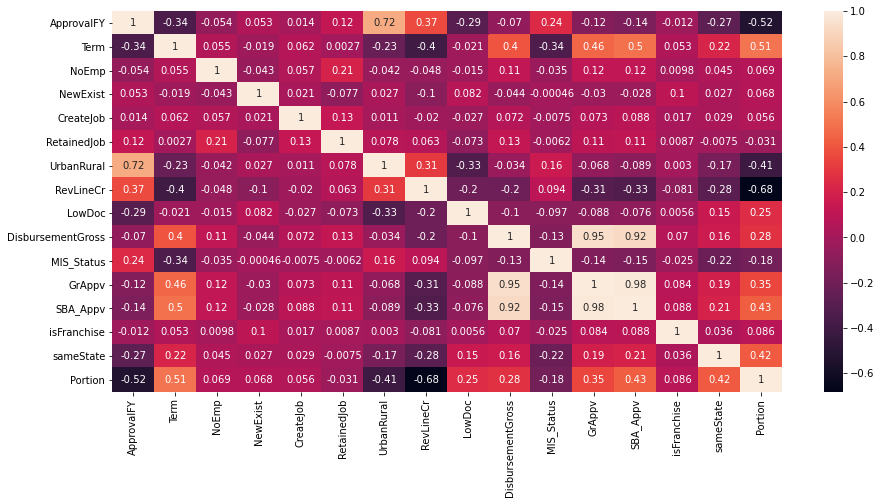

In [10]:
## Checking for correlation among features
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [11]:
##Correlation within Target
df.corr()['MIS_Status'].sort_values(ascending=False)[1:]

ApprovalFY           0.239770
UrbanRural           0.159055
RevLineCr            0.093822
NewExist            -0.000460
RetainedJob         -0.006162
CreateJob           -0.007491
isFranchise         -0.024963
NoEmp               -0.034723
LowDoc              -0.096939
DisbursementGross   -0.126766
GrAppv              -0.138854
SBA_Appv            -0.148793
Portion             -0.182906
sameState           -0.220812
Term                -0.338692
Name: MIS_Status, dtype: float64

#### Feature Selection

Note :

- ApprovalFY, this feature show Fiscal year of commitment from 1984 - 2014. So, I would not use this for modeling
- UrbanRural features give information about small business, since it has high correlation within target, I would use this for future modeling
- Drop features that has little correlation :
  - RetainedJob
  - CreateJob
  - isFranchise
  - NoEmp
- SBA_Appv and Portion -- I would like to use Portion one because it has higher correlation and drop SBA_Appv
- Dropping DisbursementGross

In [12]:
df.drop(columns=['ApprovalFY','RetainedJob','CreateJob','isFranchise','NoEmp','DisbursementGross', 'SBA_Appv'], inplace=True)

In [13]:
## Type of features after encoding
df.dtypes

Term            int64
NewExist        int64
UrbanRural      int64
RevLineCr       int64
LowDoc          int64
MIS_Status      int64
GrAppv        float64
sector         object
sameState       int64
Portion       float64
dtype: object

In [14]:
## Encoding
## One Hot Encoding Using Pandas
df = pd.get_dummies(data=df, columns=['sector'], prefix_sep='__')

In [15]:
df.head()

,Term,NewExist,UrbanRural,RevLineCr,LowDoc,MIS_Status,GrAppv,sameState,Portion,sector__Accommodation_food_serv,...,sector__Manufacturing,sector__Mining_quar_oil_gas_ext,sector__Other_no_pub,sector__Prof_scien_and_tech_serv,sector__Public_admin,"sector__RE,rental_leasing",sector__Retail_trade,sector__Trans_Ware,sector__Utilities,sector__Wholesale_trade
0,84,2,0,0,1,0,60000.0,0,0.80,0,...,0,0,0,0,0,0,1,0,0,0
1,60,2,0,0,1,0,40000.0,1,0.80,1,...,0,0,0,0,0,0,0,0,0,0
2,180,1,0,0,0,0,287000.0,1,0.75,0,...,0,0,0,0,0,0,0,0,0,0
3,120,1,0,0,0,0,517000.0,0,0.75,0,...,1,0,0,0,0,0,0,0,0,0
4,84,2,0,0,1,0,45000.0,0,0.80,0,...,0,0,1,0,0,0,0,0,0,0


In [16]:
df.columns

Index(['Term', 'NewExist', 'UrbanRural', 'RevLineCr', 'LowDoc', 'MIS_Status',
       'GrAppv', 'sameState', 'Portion', 'sector__Accommodation_food_serv',
       'sector__Admini_sup_and_waste_mgm_rem', 'sector__Ag_fores_ﬁshi_hunting',
       'sector__Arts_enter_recreation', 'sector__Construction',
       'sector__Educational_services', 'sector__Finance_insurance',
       'sector__Health_care_social_ass', 'sector__Information',
       'sector__Management_and_enterprises', 'sector__Manufacturing',
       'sector__Mining_quar_oil_gas_ext', 'sector__Other_no_pub',
       'sector__Prof_scien_and_tech_serv', 'sector__Public_admin',
       'sector__RE,rental_leasing', 'sector__Retail_trade',
       'sector__Trans_Ware', 'sector__Utilities', 'sector__Wholesale_trade'],
      dtype='object')

### Machine Learning Building

In [17]:
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn import set_config
set_config(print_changed_only=False)

## Evaluation Matrix
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score, f1_score, accuracy_score

In [18]:
x = df.drop(columns='MIS_Status') 
y = df['MIS_Status']

In [19]:
#Splitting Data
x_train, x_test, y_train, y_test = train_test_split(x,y, stratify=y, train_size=.80, random_state=42)

#### Handling Imbalance Data

#### SMOTE

In [21]:
import imblearn
from imblearn.over_sampling import SMOTE

sm = SMOTE (random_state=42)
x_train_sm, y_train_sm = sm.fit_sample(x_train, y_train)

### Base Modeling

#### 1. Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier

modelDT_sm = DecisionTreeClassifier()
#fit model
modelDT_sm.fit(x_train_sm, y_train_sm)
y_predDT_sm = modelDT_sm.predict(x_test)

In [31]:
# Evaluation Matrix for Train
y_trainDT_sm = modelDT_sm.predict(x_train_sm)

acc_trainDT_sm = accuracy_score(y_train_sm, y_trainDT_sm)
prec_trainDT_sm = precision_score(y_train_sm, y_trainDT_sm)
rec_trainDT_sm = recall_score(y_train_sm, y_trainDT_sm)
f1_trainDT_sm =f1_score(y_train_sm, y_trainDT_sm)

In [23]:
# Evaluation Matrix for Test
acc_DT_sm = accuracy_score(y_test, y_predDT_sm)
prec_DT_sm = precision_score(y_test, y_predDT_sm)
rec_DT_sm = recall_score(y_test, y_predDT_sm)
f1_DT_sm =f1_score(y_test, y_predDT_sm)

print(classification_report(y_test, y_predDT_sm))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94     72193
           1       0.77      0.83      0.80     19709

    accuracy                           0.91     91902
   macro avg       0.86      0.88      0.87     91902
weighted avg       0.91      0.91      0.91     91902



In [33]:
DT = {
    'Training':[acc_trainDT_sm, prec_trainDT_sm, rec_trainDT_sm, f1_trainDT_sm],
    'Testing':[acc_DT_sm, prec_DT_sm, rec_DT_sm, f1_DT_sm]
}
pd.DataFrame(data=DT, index=['Accuracy','Precision','Recall','F1-score'])

,Training,Testing
Accuracy,0.982495,0.909121
Precision,0.983368,0.767538
Recall,0.981591,0.826577
F1-score,0.982479,0.795964


In [24]:
cm_DT_sm = confusion_matrix(y_test, y_predDT_sm, labels=[1,0])
df_cm_DT_sm = pd.DataFrame(data=cm_DT_sm, columns=['Pred 1', 'Pred 0'], index=['Akt 1', 'Akt 0'])
df_cm_DT_sm

,Pred 1,Pred 0
Akt 1,16291,3418
Akt 0,4934,67259


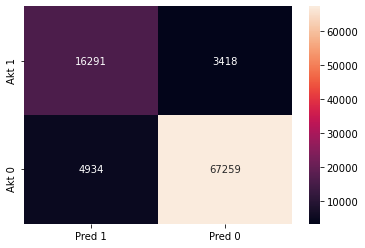

In [25]:
sns.heatmap(df_cm_DT_sm, annot=True, fmt='g')

#### 2. Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier

modelRF_sm = RandomForestClassifier()
modelRF_sm.fit(x_train_sm, y_train_sm)
y_predRF_sm = modelRF_sm.predict(x_test)

In [34]:
# Evaluation Matrix for Train
y_trainRF_sm = modelRF_sm.predict(x_train_sm)

acc_trainRF_sm = accuracy_score(y_train_sm, y_trainRF_sm)
prec_trainRF_sm = precision_score(y_train_sm, y_trainRF_sm)
rec_trainRF_sm = recall_score(y_train_sm, y_trainRF_sm)
f1_trainRF_sm =f1_score(y_train_sm, y_trainRF_sm)

In [27]:
# Evaluation matrix for Testing
acc_RF_sm = accuracy_score(y_test, y_predRF_sm)
prec_RF_sm = precision_score(y_test, y_predRF_sm)
rec_RF_sm = recall_score(y_test, y_predRF_sm)
f1_RF_sm =f1_score(y_test, y_predRF_sm)

print(classification_report(y_test, y_predRF_sm))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     72193
           1       0.81      0.83      0.82     19709

    accuracy                           0.92     91902
   macro avg       0.88      0.89      0.88     91902
weighted avg       0.92      0.92      0.92     91902



In [35]:
RF = {
    'Training':[acc_trainRF_sm, prec_trainRF_sm, rec_trainRF_sm, f1_trainRF_sm],
    'Testing':[acc_RF_sm, prec_RF_sm, rec_RF_sm, f1_RF_sm]
}
pd.DataFrame(data=RF, index=['Accuracy','Precision','Recall','F1-score'])

,Training,Testing
Accuracy,0.982475,0.921340
Precision,0.981064,0.809462
Recall,0.983942,0.828150
F1-score,0.982501,0.818699


In [28]:
cm_RF_sm = confusion_matrix(y_test, y_predRF_sm, labels=[1,0])
df_cm_RF_sm = pd.DataFrame(data=cm_RF_sm, columns=['Pred 1', 'Pred 0'], index=['Akt 1', 'Akt 0'])
df_cm_RF_sm

,Pred 1,Pred 0
Akt 1,16322,3387
Akt 0,3842,68351


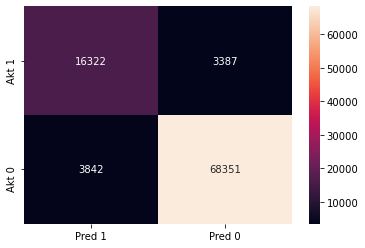

In [29]:
sns.heatmap(df_cm_RF_sm, annot=True, fmt='g')

#### 3. XGBoost

In [36]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [37]:
modelXGB_sm = XGBClassifier()
modelXGB_sm.fit(x_train_sm, y_train_sm)
y_predXGB_sm = modelXGB_sm.predict(x_test)

In [40]:
# Evaluation Matrix for Train
y_trainXGB_sm = modelXGB_sm.predict(x_train_sm)

acc_trainXGB_sm = accuracy_score(y_train_sm, y_trainXGB_sm)
prec_trainXGB_sm = precision_score(y_train_sm, y_trainXGB_sm)
rec_trainXGB_sm = recall_score(y_train_sm, y_trainXGB_sm)
f1_trainXGB_sm =f1_score(y_train_sm, y_trainXGB_sm)

In [39]:
# Evaluation Matrix for Testing
acc_XGB_sm = accuracy_score(y_test, y_predXGB_sm)
prec_XGB_sm = precision_score(y_test, y_predXGB_sm)
rec_XGB_sm = recall_score(y_test, y_predXGB_sm)
f1_XGB_sm =f1_score(y_test, y_predXGB_sm)

print(classification_report(y_test, y_predXGB_sm))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96     72193
           1       0.81      0.88      0.85     19709

    accuracy                           0.93     91902
   macro avg       0.89      0.91      0.90     91902
weighted avg       0.93      0.93      0.93     91902



In [41]:
XGB = {
    'Training':[acc_trainXGB_sm, prec_trainXGB_sm, rec_trainXGB_sm, f1_trainXGB_sm],
    'Testing':[acc_XGB_sm, prec_XGB_sm, rec_XGB_sm, f1_XGB_sm]
}
pd.DataFrame(data=XGB, index=['Accuracy','Precision','Recall','F1-score'])

,Training,Testing
Accuracy,0.947991,0.930981
Precision,0.947515,0.812290
Recall,0.948523,0.881983
F1-score,0.948019,0.845703


In [42]:
cm_XGB_sm = confusion_matrix(y_test, y_predXGB_sm, labels=[1,0])
df_cm_XGB_sm = pd.DataFrame(data=cm_XGB_sm, columns=['Pred 1', 'Pred 0'], index=['Akt 1', 'Akt 0'])
df_cm_XGB_sm

,Pred 1,Pred 0
Akt 1,17383,2326
Akt 0,4017,68176


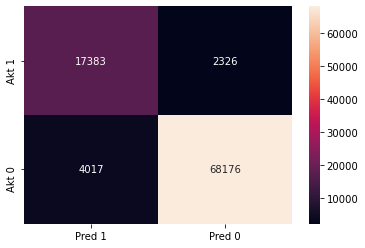

In [43]:
sns.heatmap(df_cm_XGB_sm, annot=True, fmt='g')

### Hyper Parameter Tuning

#### 1. Decision Tree Tuning

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
DT_tuned = DecisionTreeClassifier()
param_DT = {'max_depth':[None, 10, 20],
           'min_samples_split':[2,22,32],
           'min_samples_leaf':[1,11,16],
           'max_features':[None, 4, .5]}

In [46]:
model_DT = GridSearchCV(estimator=DT_tuned, param_grid=param_DT,
                       cv=3,
                       n_jobs=-1,
                        verbose=1,
                        scoring='recall'
                       )

In [47]:
model_DT.fit(x_train_sm, y_train_sm)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   28.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed:  2.0min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         '

In [49]:
DT_tuned = model_DT.best_estimator_
DT_tuned

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [50]:
y_tunedDT = DT_tuned.predict(x_test)

In [51]:
# Evaluation Matrix for Train
y_trainDT_sm_tuned = DT_tuned.predict(x_train_sm)

acc_trainDT_sm_tuned = accuracy_score(y_train_sm, y_trainDT_sm_tuned)
prec_trainDT_sm_tuned = precision_score(y_train_sm, y_trainDT_sm_tuned)
rec_trainDT_sm_tuned = recall_score(y_train_sm, y_trainDT_sm_tuned)
f1_trainDT_sm_tuned =f1_score(y_train_sm, y_trainDT_sm_tuned)

In [52]:
# Evaluation MAtix for Testing
acc_DT_tuned = accuracy_score(y_test, y_tunedDT)
prec_DT_tuned = precision_score(y_test, y_tunedDT)
rec_DT_tuned = recall_score(y_test, y_tunedDT)
f1_DT_tuned =f1_score(y_test, y_tunedDT)

print(classification_report(y_test, y_tunedDT))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95     72193
           1       0.77      0.87      0.82     19709

    accuracy                           0.92     91902
   macro avg       0.87      0.90      0.88     91902
weighted avg       0.92      0.92      0.92     91902



In [53]:
DT_tuned = {
    'Training':[acc_trainDT_sm_tuned, prec_trainDT_sm_tuned, rec_trainDT_sm_tuned, f1_trainDT_sm_tuned],
    'Testing':[acc_DT_tuned, prec_DT_tuned, rec_DT_tuned, f1_DT_tuned]
}
pd.DataFrame(data=DT_tuned, index=['Accuracy','Precision','Recall','F1-score'])

,Training,Testing
Accuracy,0.964322,0.916085
Precision,0.960984,0.770020
Recall,0.967943,0.867928
F1-score,0.964451,0.816048


In [54]:
cm_DT_tuned = confusion_matrix(y_test, y_tunedDT, labels=[1,0])
df_cm_DT_tuned = pd.DataFrame(data=cm_DT_tuned, columns=['Pred 1', 'Pred 0'], index=['Akt 1', 'Akt 0'])
df_cm_DT_tuned

,Pred 1,Pred 0
Akt 1,17106,2603
Akt 0,5109,67084


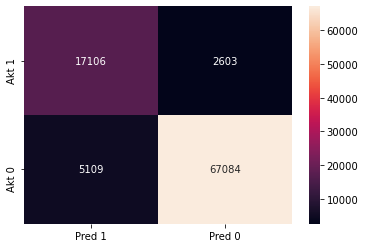

In [55]:
sns.heatmap(df_cm_DT_tuned, annot=True, fmt='g')

#### 2. Random Forest Tuning

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
RF = RandomForestClassifier()

param_RF = {'n_estimators': [100, 200],
           'max_depth':[None, 20],
           'min_samples_split':[2,30],
           'min_samples_leaf':[1,15],
           'max_features':[None,.6]}

In [58]:
model_RF = GridSearchCV(estimator=RF, param_grid=param_RF, cv=2, n_jobs=-1, verbose=1, scoring='recall')

In [59]:
model_RF.fit(x_train_sm, y_train_sm)

Fitting 2 folds for each of 32 candidates, totalling 64 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 30.0min
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed: 52.7min finished


GridSearchCV(cv=2, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [60]:
RF_tuned = model_RF.best_estimator_
RF_tuned

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features=0.6,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [61]:
y_predRF_sm_tuned = RF_tuned.predict(x_test)

In [62]:
# Evaluation Matrix for Train
y_trainRF_sm_tuned = RF_tuned.predict(x_train_sm)

acc_trainRF_sm_tuned = accuracy_score(y_train_sm, y_trainRF_sm_tuned)
prec_trainRF_sm_tuned = precision_score(y_train_sm, y_trainRF_sm_tuned)
rec_trainRF_sm_tuned = recall_score(y_train_sm, y_trainRF_sm_tuned)
f1_trainRF_sm_tuned =f1_score(y_train_sm, y_trainRF_sm_tuned)

In [63]:
# Evaluation Matrix for Testing
acc_RF_sm_tuned = accuracy_score(y_test, y_predRF_sm_tuned)
prec_RF_sm_tuned = precision_score(y_test, y_predRF_sm_tuned)
rec_RF_sm_tuned = recall_score(y_test, y_predRF_sm_tuned)
f1_RF_sm_tuned =f1_score(y_test, y_predRF_sm_tuned)

print(classification_report(y_test, y_predRF_sm_tuned))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95     72193
           1       0.80      0.89      0.84     19709

    accuracy                           0.93     91902
   macro avg       0.88      0.91      0.90     91902
weighted avg       0.93      0.93      0.93     91902



In [64]:
RF_tuned = {
    'Training':[acc_trainRF_sm_tuned, prec_trainRF_sm_tuned, rec_trainRF_sm_tuned, f1_trainRF_sm_tuned],
    'Testing':[acc_RF_sm_tuned, prec_RF_sm_tuned, rec_RF_sm_tuned, f1_RF_sm_tuned]
}
pd.DataFrame(data=RF_tuned, index=['Accuracy','Precision','Recall','F1-score'])

,Training,Testing
Accuracy,0.967302,0.927738
Precision,0.962608,0.798847
Recall,0.972376,0.886194
F1-score,0.967467,0.840257


In [65]:
cm_RF_sm_tuned = confusion_matrix(y_test, y_predRF_sm_tuned, labels=[1,0])
df_cm_RF_sm_tuned = pd.DataFrame(data=cm_RF_sm_tuned, columns=['Pred 1', 'Pred 0'], index=['Akt 1', 'Akt 0'])
df_cm_RF_sm_tuned

,Pred 1,Pred 0
Akt 1,17466,2243
Akt 0,4398,67795


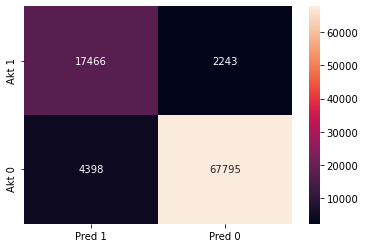

In [66]:
sns.heatmap(df_cm_RF_sm_tuned, annot=True, fmt='g')

#### XGBoost Tuning

In [67]:
from xgboost import XGBClassifier

In [68]:
XGB_sm = XGBClassifier()

param_XGB = {'n_estimators': [100, 200],
           'max_depth':[None, 20],
           'learning_rate':[0.1, 0.3],
           'colsample_bytree':[None,.5]}

In [69]:
model_XGB = GridSearchCV(estimator=XGB_sm, param_grid=param_XGB, cv=2, n_jobs=-1, verbose=1, scoring='recall')

In [70]:
model_XGB.fit(x_train_sm, y_train_sm)

Fitting 2 folds for each of 16 candidates, totalling 32 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed: 16.7min finished


GridSearchCV(cv=2, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estim...
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=None, 

In [88]:
XGB_tuned = model_XGB.best_estimator_
XGB_tuned

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [89]:
y_predXGB_sm_tuned = XGB_tuned.predict(x_test)

In [90]:
# Evaluation Matrix for Train
y_trainXGB_sm_tuned = XGB_tuned.predict(x_train_sm)

acc_trainXGB_sm_tuned = accuracy_score(y_train_sm, y_trainXGB_sm_tuned)
prec_trainXGB_sm_tuned = precision_score(y_train_sm, y_trainXGB_sm_tuned)
rec_trainXGB_sm_tuned = recall_score(y_train_sm, y_trainXGB_sm_tuned)
f1_trainXGB_sm_tuned =f1_score(y_train_sm, y_trainXGB_sm_tuned)

In [91]:
# Evaluation Matrix for Testing
acc_XGB_tuned = accuracy_score(y_test, y_predXGB_sm_tuned)
prec_XGB_tuned = precision_score(y_test, y_predXGB_sm_tuned)
rec_XGB_tuned = recall_score(y_test, y_predXGB_sm_tuned)
f1_XGB_tuned =f1_score(y_test, y_predXGB_sm_tuned)

print(classification_report(y_test, y_predXGB_sm_tuned))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95     72193
           1       0.77      0.89      0.83     19709

    accuracy                           0.92     91902
   macro avg       0.87      0.91      0.89     91902
weighted avg       0.93      0.92      0.92     91902



In [92]:
XGB_tun = {
    'Training':[acc_trainXGB_sm_tuned, prec_trainXGB_sm_tuned, rec_trainXGB_sm_tuned, f1_trainXGB_sm_tuned],
    'Testing':[acc_XGB_tuned, prec_XGB_tuned, rec_XGB_tuned, f1_XGB_tuned]
}
pd.DataFrame(data=XGB_tun, index=['Accuracy','Precision','Recall','F1-score'])

,Training,Testing
Accuracy,0.939410,0.921112
Precision,0.931568,0.773716
Recall,0.948495,0.893450
F1-score,0.939955,0.829283


In [93]:
cm_XGB_sm_tuned = confusion_matrix(y_test, y_predXGB_sm_tuned, labels=[1,0])
df_cm_XGB_sm_tuned = pd.DataFrame(data=cm_XGB_sm_tuned, columns=['Pred 1', 'Pred 0'], index=['Akt 1', 'Akt 0'])
df_cm_XGB_sm_tuned

,Pred 1,Pred 0
Akt 1,17609,2100
Akt 0,5150,67043


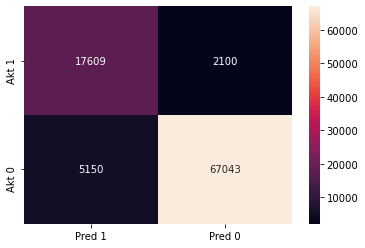

In [94]:
sns.heatmap(df_cm_XGB_sm_tuned, annot=True, fmt='g')

### Evaluation Matrix

In [95]:
eva_mat = {
    'Decision Tree':[acc_DT_sm, prec_DT_sm, rec_DT_sm, f1_DT_sm],
    'Decision Tree Tuned':[acc_DT_tuned, prec_DT_tuned, rec_DT_tuned, f1_DT_tuned],
    'Random Forest':[acc_RF_sm, prec_RF_sm, rec_RF_sm, f1_RF_sm],
    'Random Forest Tuned':[acc_RF_sm_tuned, prec_RF_sm_tuned, rec_RF_sm_tuned, f1_RF_sm_tuned],
    'XGBoost':[acc_XGB_sm, prec_XGB_sm, rec_XGB_sm, f1_XGB_sm],
    'XGBoost tuned':[acc_XGB_tuned, prec_XGB_tuned, rec_XGB_tuned, f1_XGB_tuned]
}

In [96]:
pd.DataFrame(data=eva_mat, index=['Accuracy','Precision','Recall','F1-score'])

,Decision Tree,Decision Tree Tuned,Random Forest,Random Forest Tuned,XGBoost,XGBoost tuned
Accuracy,0.909121,0.916085,0.921340,0.927738,0.930981,0.921112
Precision,0.767538,0.770020,0.809462,0.798847,0.812290,0.773716
Recall,0.826577,0.867928,0.828150,0.886194,0.881983,0.893450
F1-score,0.795964,0.816048,0.818699,0.840257,0.845703,0.829283


#### Predict Proba

In [98]:
pred_proba = XGB_tuned.predict_proba(x_test)

In [99]:
pred_proba

array([[0.8107837 , 0.18921632],
       [0.8947532 , 0.10524681],
       [0.04833579, 0.9516642 ],
       ...,
       [0.25496745, 0.74503255],
       [0.0615992 , 0.9384008 ],
       [0.55601966, 0.44398034]], dtype=float32)

#### Export Model

In [ ]:
import joblib

In [ ]:
# joblib.dump(XGB_tuned, 'ModelSBA_loan')